This Project uses dataset "Bank Loan Classification" from Kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from catboost import CatBoostClassifier

import pickle
import json

%matplotlib inline

- ID : unique identifier
- Personal Loan : did the customer accept the personal load offered (1=Yes, 0=No)
- Age : customer’s age
- Experience : number of years of profession experience
- Income : annual income of the customer ($000)
- Zip code: home address zip code
- Family : family size of customer
- CCAvg : average spending on credit cards per month ($000)
- Education: education level (1) undergraduate, (2) graduate, (3) advanced/professional
- Mortgage : value of house mortgage ($000)
- Securities : does the customer have a securities account with the bank? (1=Yes, 0=No)
- CDAccount : does the customer have a certificate of deposit with the bank? (1=Yes, 0=No)
- Online : does the customer use Internet banking facilities (1=Yes, 0=No)
- CreditCard : does the customer use a credit card issued by Universal Bank? (1=Yes, 0=No)

- link to description: https://rstudio-pubs-static.s3.amazonaws.com/474745_1faa956045b74cbd8f73d9ede798b91b.html
- link to dataset: https://www.kaggle.com/datasets/sriharipramod/bank-loan-classification/code

In [2]:
df = pd.read_csv("../dataset/UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.describe().round(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


## Feature Engineering

In [6]:
df["ZIP Code"]

0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIP Code, Length: 5000, dtype: int64

In [7]:
df["ZIP Code"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00     9307.0
0.25    91911.0
0.50    93437.0
0.75    94608.0
1.00    96651.0
Name: ZIP Code, dtype: float64

In [8]:
df["ZIP Code"].sort_values()

384      9307
652     90005
1619    90005
1681    90005
4186    90005
        ...  
3525    96651
1426    96651
2731    96651
672     96651
1653    96651
Name: ZIP Code, Length: 5000, dtype: int64

In [9]:
df["ZIP Code"].nunique()

467

In [10]:
df2 = df.drop(["ID"], axis=1)
df2.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
len(df2.columns)

13

In [12]:
df["Age"].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

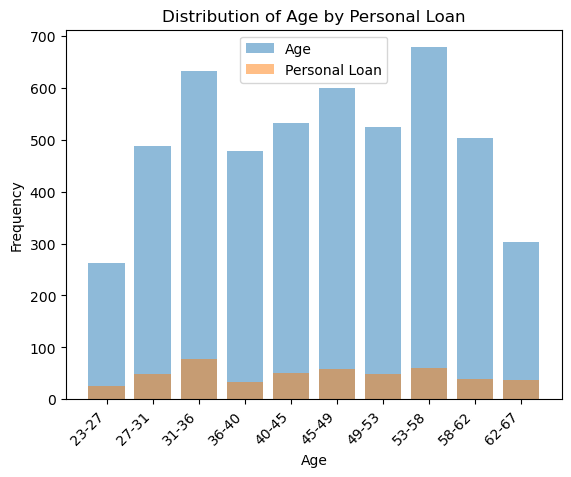

In [13]:

bins = 10
bar_width = 3.5

# Compute the histogram for "Age" to define the bin edges
age_hist, age_bins = np.histogram(df2["Age"], bins=bins)
# Compute the histogram for "Personal Loan" using the same bins as "Age"
loan_hist, _ = np.histogram(df2["Age"][df2["Personal Loan"] == 1], bins=age_bins)
# Calculate the centers of the bars for "Age"
age_centers = age_bins[:-1] + np.diff(age_bins) / 2
plt.bar(age_centers, age_hist, width=bar_width, alpha=0.5, label="Age")
# Plot histogram for "Personal Loan" (overlapping with "Age" bars)
plt.bar(age_centers, loan_hist, width=bar_width, alpha=0.5, label="Personal Loan")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age by Personal Loan")
plt.xticks(age_centers, 
        [f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins)-1)], 
        rotation=45, ha='right')
plt.legend()
plt.show()


In [14]:
df2.groupby(["ZIP Code"])["Age"].count().sort_values(ascending=False)

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: Age, Length: 467, dtype: int64

In [15]:
df2.groupby(["ZIP Code"])["Age"].count().sort_values(ascending=False)[:60]

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
92093     51
90245     50
90024     50
91330     46
90089     46
92121     45
94304     45
94143     37
95051     34
94608     34
92521     32
92028     32
92182     32
95054     31
95814     30
95014     29
94301     27
94542     27
94550     27
95819     26
93407     26
95039     26
94501     26
95064     26
95060     25
91107     25
94105     25
94022     25
94303     25
94596     24
93117     24
95521     23
93555     23
94080     23
92717     22
91380     22
92612     22
94110     21
92647     21
91768     21
90034     20
90401     20
94132     20
94117     20
90266     19
94005     19
95747     19
92122     19
90025     19
92697     19
Name: Age, dtype: int64

In [16]:
df2 = df2[df2["ZIP Code"] != 9307]
df2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [17]:
df2[df2["Experience"] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [18]:
df2[df2["Experience"] == 1]["Age"].describe()

count    74.000000
mean     26.513514
std       1.473448
min      25.000000
25%      26.000000
50%      26.000000
75%      27.000000
max      31.000000
Name: Age, dtype: float64

In [19]:
df2[df2["Experience"] == 2]["Age"].describe()

count    85.000000
mean     27.305882
std       1.224974
min      26.000000
25%      26.000000
50%      27.000000
75%      28.000000
max      32.000000
Name: Age, dtype: float64

In [20]:
df2[df2["Experience"] == 3]["Age"].describe()

count    129.000000
mean      28.364341
std        1.298665
min       27.000000
25%       27.000000
50%       28.000000
75%       29.000000
max       33.000000
Name: Age, dtype: float64

In [21]:
df2 = df2[df2["Experience"] > 0]

In [22]:
age_exp_diff = df2["Age"] - df2["Experience"]
age_exp_diff.unique()

array([24, 26, 27, 25, 30], dtype=int64)

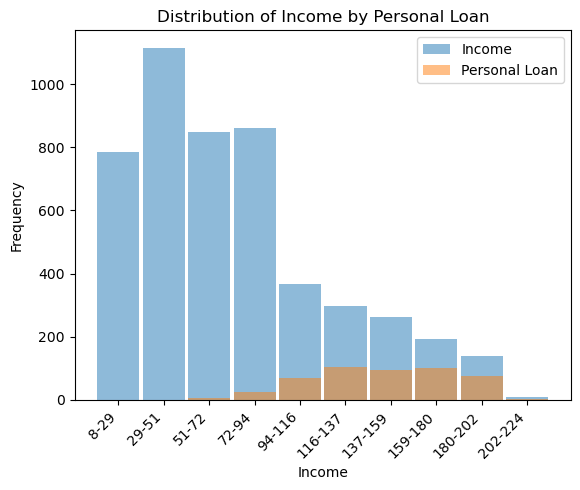

In [23]:

bins = 10
bar_width = 20

# Compute the histogram for "Age" to define the bin edges
age_hist, age_bins = np.histogram(df2["Income"], bins=bins)
# Compute the histogram for "Personal Loan" using the same bins as "Age"
loan_hist, _ = np.histogram(df2["Income"][df2["Personal Loan"] == 1], bins=age_bins)
# Calculate the centers of the bars for "Age"
age_centers = age_bins[:-1] + np.diff(age_bins) / 2
plt.bar(age_centers, age_hist, width=bar_width, alpha=0.5, label="Income")
# Plot histogram for "Personal Loan" (overlapping with "Age" bars)
plt.bar(age_centers, loan_hist, width=bar_width, alpha=0.5, label="Personal Loan")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income by Personal Loan")
plt.xticks(age_centers, 
        [f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins)-1)], 
        rotation=45, ha='right')
plt.legend()
plt.show()


In [24]:
df2[df2["Income"]<10].shape

(49, 13)

In [25]:
df2.describe().round()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0,4881.0
mean,46.0,21.0,74.0,93167.0,2.0,2.0,2.0,57.0,0.0,0.0,0.0,1.0,0.0
std,11.0,11.0,46.0,1761.0,1.0,2.0,1.0,102.0,0.0,0.0,0.0,0.0,0.0
min,25.0,1.0,8.0,90005.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,36.0,11.0,39.0,91911.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,46.0,21.0,64.0,93437.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,55.0,30.0,98.0,94608.0,3.0,3.0,3.0,102.0,0.0,0.0,0.0,1.0,1.0
max,67.0,43.0,224.0,96651.0,4.0,10.0,3.0,635.0,1.0,1.0,1.0,1.0,1.0


In [26]:
df2[df2["Mortgage"] > 200].shape

(488, 13)

In [27]:
df2.groupby(["ZIP Code"])["Age"].count().describe()

count    465.000000
mean      10.496774
std       14.052415
min        1.000000
25%        4.000000
50%        6.000000
75%       12.000000
max      164.000000
Name: Age, dtype: float64

In [28]:
df2.groupby(["ZIP Code"])["Age"].count().quantile(0.65)

9.0

In [29]:
df2["ZIP Code"].min(), df2["ZIP Code"].max()

(90005, 96651)

In [30]:
less_number_zip_code = df2.groupby(["ZIP Code"])["Age"].count().sort_values(ascending=True) < 6
less_number_zip_code

ZIP Code
94087     True
91024     True
90813     True
94404     True
95842     True
         ...  
93106    False
90095    False
95616    False
94305    False
94720    False
Name: Age, Length: 465, dtype: bool

In [31]:

less_pop_zip_code_df = {}
for k, v in zip(less_number_zip_code.index.values.tolist(),
    less_number_zip_code.values.reshape([-1, ]).tolist()):
    less_pop_zip_code_df[k] = v

less_pop_zip_code_df

{94087: True,
 91024: True,
 90813: True,
 94404: True,
 95842: True,
 94598: True,
 94965: True,
 92694: True,
 94566: True,
 96094: True,
 96145: True,
 94970: True,
 95005: True,
 95037: True,
 90623: True,
 90304: True,
 92116: True,
 90280: True,
 90745: True,
 94604: True,
 92161: True,
 94526: True,
 91129: True,
 90272: True,
 91207: True,
 94509: True,
 94507: True,
 91326: True,
 94116: True,
 94019: True,
 91784: True,
 91941: True,
 93033: True,
 92835: True,
 92834: True,
 94575: True,
 95193: True,
 92705: True,
 95482: True,
 95816: True,
 90044: True,
 95405: True,
 90016: True,
 95307: True,
 96008: True,
 93403: True,
 94703: True,
 94558: True,
 90045: True,
 93311: True,
 91773: True,
 93111: True,
 90057: True,
 92177: True,
 94536: True,
 92692: True,
 92673: True,
 93657: True,
 91710: True,
 93720: True,
 91342: True,
 91343: True,
 91345: True,
 95973: True,
 92661: True,
 93933: True,
 92251: True,
 92106: True,
 91801: True,
 92735: True,
 94618: True,
 90755

In [32]:
df2["New Zip Code"] = [99999 if less_pop_zip_code_df[x] else x for x in df2["ZIP Code"]]
df2

C:\Users\Azizjon\AppData\Local\Temp\ipykernel_9636\4029885634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["New Zip Code"] = [99999 if less_pop_zip_code_df[x] else x for x in df2["ZIP Code"]]


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,New Zip Code
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,91107
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,90089
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,94720
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,94112
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,91330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,92697
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,92037
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,93023
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,90034


In [33]:
df3 = df2.drop("ZIP Code", axis=1)

In [34]:
pd.get_dummies(df3["New Zip Code"], dtype=int).drop(99999, axis=1)

,90007,90009,90024,90025,90028,90032,90033,90034,90035,90036,...,95818,95819,95821,95827,95831,95833,95841,95929,96001,96651
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
pd.get_dummies(df3["Education"], dtype=int).drop(1, axis=1)

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
4995,0,1
4996,0,0
4997,0,1
4998,1,0


In [36]:
df4 = pd.concat([df3, pd.get_dummies(df3["New Zip Code"], dtype=int).drop(99999, axis=1)], axis=1)

df4 = pd.concat([df4, pd.get_dummies(df3["Education"], dtype=int).drop(1, axis=1)], axis=1)
df4.drop(["New Zip Code", "Education"], axis=1, inplace=True)

In [37]:
df4

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,...,95821,95827,95831,95833,95841,95929,96001,96651,2,3
0,25,1,49,4,1.6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4996,30,4,15,4,0.4,85,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
X = df4.drop("Personal Loan", axis=1)
y = df4["Personal Loan"]

X.columns = [str(x) for x in X.columns]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [40]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)


In [41]:
X_train_scaled.shape

(3904, 289)

In [42]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca.shape

(3904, 270)

The PCA=0.95 still includes most of the columns, which indicates that using, Lasso and Ridge Regressions doesnt help much. As 270 columns still retain 95% of the data importance.

Besides that when I run Lasso and Ridge Classifiers, they become computationally costly as well

## Model building

- Train dataset after applying Scaling + PCA

In [43]:
scores_logistic = cross_val_score(LogisticRegression(C=10, solver="sag", max_iter=3000), X_train_pca, y_train, cv=5)
scores_logistic.mean()

0.9316060934370795

In [44]:
scores_xgb = cross_val_score(XGBClassifier(), X_train_pca, y_train, cv=5)
scores_xgb.mean()

0.9308401457697233

In [45]:
scores_svc = cross_val_score(SVC(C=1, gamma="scale", kernel="linear"), X_train_pca, y_train, cv=5)
scores_svc.mean()

0.922899635575692

- Train dataset after applying Scaling

In [46]:
scores_logistic = cross_val_score(LogisticRegression(C=10, solver="sag", max_iter=3000), X_train_scaled, y_train, cv=5)
scores_logistic.mean()

0.9405725729669392

In [47]:
scores_xgb = cross_val_score(XGBClassifier(), X_train_scaled, y_train, cv=5)
scores_xgb.mean()

0.9871919629666109

In [48]:
scores_svc = cross_val_score(SVC(C=1, gamma="scale", kernel="linear"), X_train_scaled, y_train, cv=5)
scores_svc.mean()

0.9528681177976953

- Train dataset without applying scaling and PCA

In [49]:
scores_logistic = cross_val_score(LogisticRegression(C=10, solver="sag", max_iter=7000), X_train, y_train, cv=2)
scores_logistic.mean()

0.9403176229508197

In [50]:
scores_xgb = cross_val_score(XGBClassifier(), X_train, y_train, cv=5)
scores_xgb.mean()

0.9871919629666109

In [51]:
scores_svc = cross_val_score(SVC(C=1, gamma="scale", kernel="linear"), X_train, y_train, cv=5)
scores_svc.mean()

0.9544036245444696

Using Train set with Scaling and PCA dimensionality reduction methods did not yield better results. 
For this reason, I decided to go further with Train set and scaled Train set only (no dimension reduction).
But if we pay attention to the computational cost, we can notice that using scaled Train set is  more efficient than scaling on the whole.
Although both of them give the same result, I decided to use scaled Train set as it makes more sense to scale dataset first

In [52]:
model_params = {

    "logistic" : {
        "model" : LogisticRegression(max_iter=3000),
        "params" : {
            "C" : [1, 10, 100],
            "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag","saga"]
        }
    },
    # "lasso" : {
    #     "model" : LogisticRegression(penalty="l1", max_iter=7000),
    #     "params" : {
    #         "C" : [1, 10, 20],
    #         "solver" : ["saga", "liblinear"]
    #     }
    # },
    # "ridge" : {
    #     "model" : RidgeClassifier(max_iter=7000),
    #     "params" : {
    #         "alpha" : [1, 10, 20],
    #         "solver" : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    #     }
    # },
    "decision_tree" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "max_features" : ["auto", "sqrt", "log2", None]
        }
    },
    "random_forest" : {
        "model" : RandomForestClassifier(bootstrap=False),
        "params" : {
            "n_estimators" : [5, 15, 25]        
        }
    },
    "svc" : {
        "model" : SVC(),
        "params" : {
            "C" : [1, 5, 10],
            "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
            "gamma" : ['scale', 'auto']
        }
    },
    "naive_bayes" : {
        "model" : BernoulliNB(),
        "params" : {
            "alpha" : [0, 1, 10]
        }
    },
    "knn" : {
        "model" : KNeighborsClassifier(),
        "params" : {
            "n_neighbors" : [3, 5, 7]
        }
    },
    "adaboost" : {
        "model" : AdaBoostClassifier(),
        "params" : {
            "learning_rate" : [0.01, 0.1, 1, 5]
        }
    },
    "gradient_boost" : {
        "model" : GradientBoostingClassifier(),
        "params" : {
            "learning_rate" : [0.01, 0.1, 1, 5]
        }
    },
    "hist_grad_boost" : {
        "model" : HistGradientBoostingClassifier(),
        "params" : {
            "learning_rate" : [0.01, 0.1, 1, 5]
        }
    },
    "xgb" : {
        "model" : XGBClassifier(),
        "params" : {
        }
    },
    "xgb_rf" : {
        "model" : XGBRFClassifier(),
        "params" : {
            "learning_rate" : [0.01, 0.1, 1, 5],
            "reg_lambda" : [0.0001, 0.001, 0.01]
        }
    },
    "cat_boost" : {
        "model" : CatBoostClassifier(),
        "params" : {
            "learning_rate" : [0.01, 0.1, 1]
        }
    }
}


In [53]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)

    print("\n**************")
    print(mp["model"], mp["params"])
    print("**************\n")

    clf.fit(X_train_scaled, y_train)
    scores.append({
        "model" : model_name,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    }
)






**************
LogisticRegression(max_iter=3000) {'C': [1, 10, 100], 'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
**************


**************
DecisionTreeClassifier() {'max_features': ['auto', 'sqrt', 'log2', None]}
**************



c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Azizjon\anaconda3\Lib\site-p


**************
RandomForestClassifier(bootstrap=False) {'n_estimators': [5, 15, 25]}
**************


**************
SVC() {'C': [1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
**************


**************
BernoulliNB() {'alpha': [0, 1, 10]}
**************



c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: Futur


**************
KNeighborsClassifier() {'n_neighbors': [3, 5, 7]}
**************


**************
AdaBoostClassifier() {'learning_rate': [0.01, 0.1, 1, 5]}
**************


**************
GradientBoostingClassifier() {'learning_rate': [0.01, 0.1, 1, 5]}
**************


**************
HistGradientBoostingClassifier() {'learning_rate': [0.01, 0.1, 1, 5]}
**************


**************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_c

In [54]:
df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,logistic,0.943647,"{'C': 1, 'solver': 'sag'}"
1,decision_tree,0.980277,{'max_features': None}
2,random_forest,0.980790,{'n_estimators': 25}
3,svc,0.952868,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
4,naive_bayes,0.915217,{'alpha': 1}
5,knn,0.906506,{'n_neighbors': 5}
6,adaboost,0.965161,{'learning_rate': 1}
7,gradient_boost,0.984887,{'learning_rate': 0.1}
8,hist_grad_boost,0.985656,{'learning_rate': 0.1}
9,xgb,0.987192,{}


In [55]:
X_test_scaled = scalar.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [116]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
model_xgb.score(X_test_scaled, y_test)

0.9877175025588536

In [118]:
y_pred = model_xgb.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[879,   3],
       [  9,  86]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

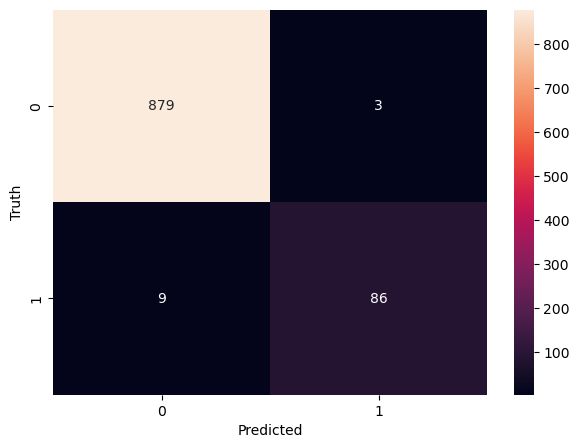

In [119]:
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       882
           1       0.97      0.91      0.93        95

    accuracy                           0.99       977
   macro avg       0.98      0.95      0.96       977
weighted avg       0.99      0.99      0.99       977



## NN Model

In [61]:
from tensorflow import keras


In [101]:

model_nn = keras.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=(289,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


model_nn.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics=["accuracy"])



In [102]:
model_nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
122/122 [==============================] - 1s 1ms/step - loss: 0.9404 - accuracy: 0.8210
Epoch 2/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8850
Epoch 3/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8970
Epoch 4/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9009
Epoch 5/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.9019
Epoch 6/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.9009
Epoch 7/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9037
Epoch 8/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9006
Epoch 9/100
122/122 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9024
Epoch 10/100
122/122 [==============================] - 0s 2ms/step - loss: 0.2166 - accura

In [103]:
y_pred_nn = model_nn.predict(X_test)
y_pred_nn = [round(x) for x in y_pred_nn.reshape(-1, ).tolist()]
cm = confusion_matrix(y_test, y_pred_nn)
cm

31/31 [==============================] - 0s 3ms/step


array([[869,  13],
       [ 15,  80]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

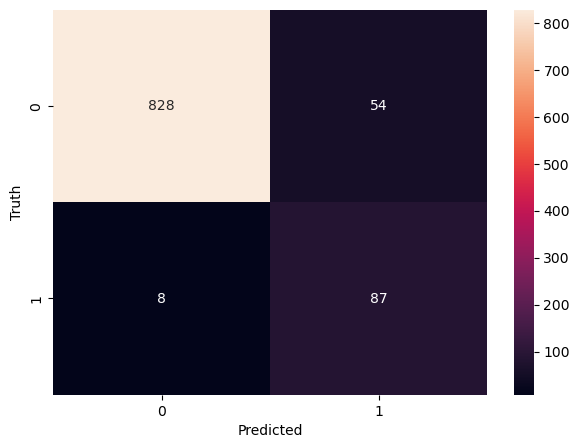

In [99]:
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [104]:
(869+80)/977

0.9713408393039918

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       882
           1       0.80      0.68      0.74        95

    accuracy                           0.95       977
   macro avg       0.88      0.83      0.86       977
weighted avg       0.95      0.95      0.95       977



## Model saving

In [125]:
with open("../model/model_xgb", "wb") as f:
    pickle.dump(model_xgb, f)

with open("../model/model_nn", "wb") as f:
    pickle.dump(model_nn, f)

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../model/columns.json","w") as f:
    f.write(json.dumps(columns))

with open("../model/standard_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scalar, scaler_file)

In [132]:
with open("../model/model_xgb", "rb") as f:
    saved_model_xgb = pickle.load(f)

with open("../model/standard_scaler.pkl", "rb") as f:
    saved_scaler = pickle.load(f)

In [133]:
X_test.loc[954]

Age            37.0
Experience     12.0
Income        169.0
Family          2.0
CCAvg           5.2
              ...  
95929           0.0
96001           0.0
96651           0.0
2               0.0
3               1.0
Name: 954, Length: 289, dtype: float64

In [153]:
input_data = saved_scaler.transform(X_test.loc[954].values.reshape(1, -1))
input_data

c:\Users\Azizjon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.79300641, -0.77498208,  2.07452231, -0.33957604,  1.90329758,
         1.94672423, -0.34115315, -0.25706829,  0.8232233 , -0.64500536,
        -0.03202563, -0.04531433, -0.10676593, -0.06613284, -0.03923329,
        -0.04238223, -0.04238223, -0.06613284, -0.02773145, -0.03923329,
        -0.04806927, -0.04238223, -0.03581034, -0.055527  , -0.02773145,
        -0.03202563, -0.03581034, -0.03202563, -0.09233054, -0.11038857,
        -0.04806927, -0.03923329, -0.03581034, -0.1030219 , -0.04531433,
        -0.03581034, -0.06613284, -0.06210501, -0.055527  , -0.06210501,
        -0.04806927, -0.03581034, -0.03923329, -0.03581034, -0.05315623,
        -0.03581034, -0.055527  , -0.04238223, -0.06210501, -0.04238223,
        -0.03202563, -0.03581034, -0.04531433, -0.03923329, 14.29942951,
        -0.03923329, -0.04531433, -0.04238223, -0.04531433, -0.055527  ,
        -0.10798635, -0.09781687, -0.04806927, -0.04806927, -0.04238223,
        -0.03581034, -0.03202563, -0.06415003, -0.0

In [155]:
#input_data = np.expand_dims(X_test.loc[1884].values, axis=0)
# prediction = saved_model_nn.predict(input_data)
# prediction = round(prediction[0][0])
# prediction

prediction = saved_model_xgb.predict(input_data)
prediction = round(prediction[0])
prediction

1

In [158]:
X_test.loc[954][:10]

Age                    37.0
Experience             12.0
Income                169.0
Family                  2.0
CCAvg                   5.2
Mortgage              249.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              0.0
Name: 954, dtype: float64

In [159]:
X.loc[1884][10:][X.loc[954][10:]==1]

91107    0.0
3        0.0
Name: 1884, dtype: float64